In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('./day.csv', delimiter=',')
data = data.drop(['dteday'], axis=1)
data = data.drop(['instant'], axis=1)

<Axes: xlabel='temp', ylabel='Density'>

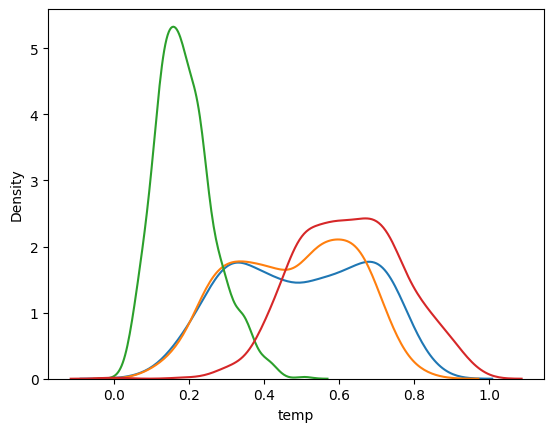

In [3]:
sns.kdeplot(data['temp'])
sns.kdeplot(data['atemp'])
sns.kdeplot(data['windspeed'])
sns.kdeplot(data['hum'])

In [21]:
# Model 2.0 Расчет зависимости количества арендованных велосипедов от ['temp', 'hum', 'windspeed']

needed_columns = ['temp', 'hum', 'windspeed', 'cnt'] 
data = data[needed_columns]

x = data.drop(['cnt'], axis=1)
y = data['cnt']

# Сплит данных (80% - обучающие данные, 20% - тестовые данные)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)

In [5]:
X_train.shape, Y_train.shape

((584, 3), (584,))

In [6]:
X_test.shape, Y_test.shape

((147, 3), (147,))

In [22]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
Y_pred = model.predict(X_test)

In [24]:
# Prediction results
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients:  [ 6535.77613858 -3079.65826811 -4819.7425118 ]
Intercept:  4111.860317769239
MSE: 1767798.68
Coefficient of determination (R^2): 0.54


0.5406921873481146

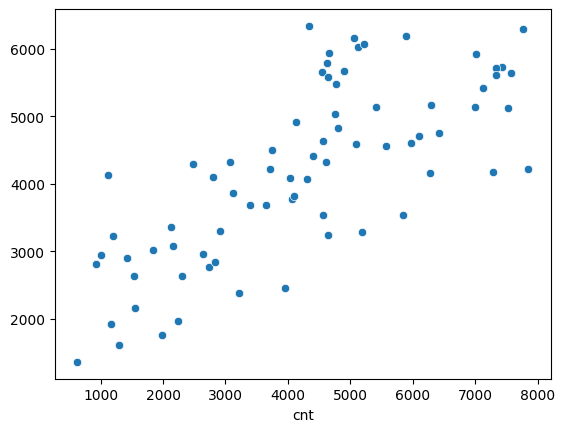

In [25]:
sns.scatterplot(x=Y_test, y=Y_pred)
r2_score(Y_test, Y_pred) # Коэфф. детерминации